## Rendimento Casa/Fuori Casa

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from highlight_text import ax_text

In [40]:

df = pd.read_csv('fbref_data.csv', sep=',')
df.set_index('Squad')

,Casa,Fuori
Squad,,
Napoli,39,44
Juventus,42,27
Inter,39,27
Lazio,34,31
Milan,37,24
Roma,32,27
Atalanta,27,31
Fiorentina,30,19
Monza,26,23


In [47]:
def calc_diff(data):
    diffs = pd.Series(index=data.index, name='Diff')
    for x in data.itertuples():
        diffs.loc[x.Index] = (x.Casa-x.Fuori)
    return data.merge(diffs, right_index=True, left_index=True).set_index('Squad')
df_sum = calc_diff(df)

<Axes: ylabel='Squad'>

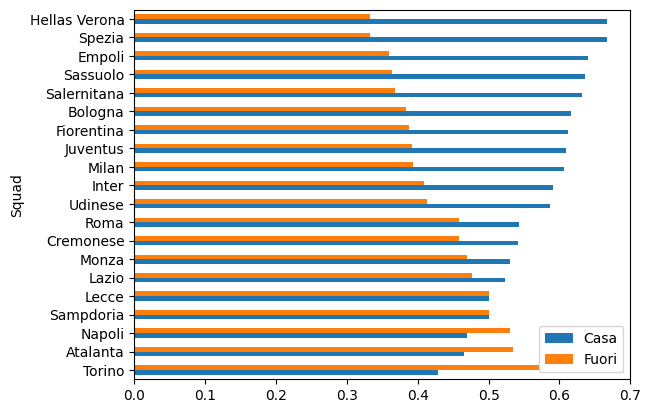

In [48]:
def calc_percent(data):
    df = pd.DataFrame(index=data.index, columns=data.columns)
    for x in data.itertuples():
        tot = x.Casa + x.Fuori
        df.loc[x.Index].Casa = x.Casa / tot 
        df.loc[x.Index].Fuori = x.Fuori / tot
        df.loc[x.Index].Diff = x.Diff / tot
    return df
calc_percent(df_sum).sort_values(by='Diff')[['Casa', 'Fuori']].plot.barh()

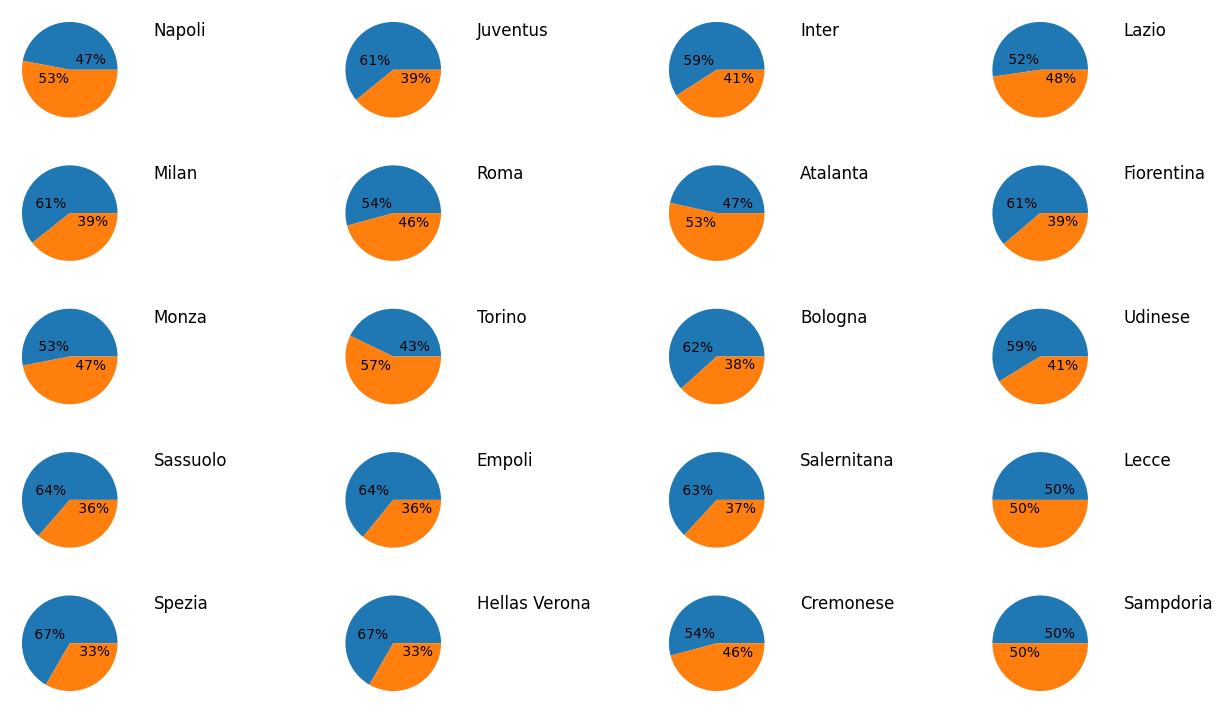

In [85]:
fig = plt.figure(figsize=(16,9))
nrows = 5
ncols = 4
for i in range(0, len(df_sum)):
    ax = plt.subplot(nrows, ncols,i+1)
    ax_text(
            x = 1.2, 
            y = 0.9,
            s = f'{df_sum.index[i]}',
            ax = ax, 
            ha = 'left', 
            size = 12,
            annotationbbox_kw = {'xycoords':'axes fraction'}
    )
    tot = df_sum.iloc[i][['Casa', 'Fuori']].sum()
    ax.pie(df_sum.iloc[i][['Casa', 'Fuori']], 
            labels=[f'{round(df_sum.iloc[i].Casa*100 / tot): 0.0f}%', f'{round(df_sum.iloc[i].Fuori*100 / tot): .0f}%'],
            labeldistance=0.2)
#df_sum[df_sum.Team == 'Napoli'][['Casa', 'Fuori']].iloc[0]

<Axes: ylabel='Squad'>

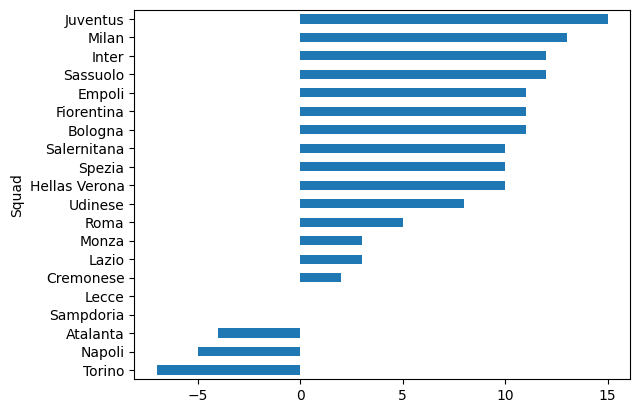

In [50]:
df_sum['Diff'].sort_values().plot.barh()